In [2]:
import numpy as np 
import pandas as pd 
# import matplotlib 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("C:\\Users\\HP\\Documents\\Kaggle_house_price\\train.csv")
testdf = pd.read_csv("C:\\Users\\HP\\Documents\\Kaggle_house_price\\test.csv")
predicted = pd.read_csv("C:\\Users\\HP\\Documents\\Kaggle_house_price\\sample_submission.csv")

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
testdf = testdf.drop(['Id'], axis = 1)
df = df.drop(['Id'], axis = 1)
predicted = predicted.drop(['Id'], axis = 1)

testdf = pd.concat([testdf, predicted], axis =1)

testdf.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


In [5]:
#Joining Test and Train DataSet
df = pd.concat([df,testdf])
df.shape

df.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,167081.220949
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,164788.778231
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,219222.423400
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,184924.279659
1458,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,187741.866657


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

In [7]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180052.854647
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,57381.565721
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,154795.084126
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,176734.841494
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,191895.744157
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [8]:
#Checking percentage of null values

for i in df.columns:
    print(i, df[i].isnull().mean()*100)

MSSubClass 0.0
MSZoning 0.1370332305584104
LotFrontage 16.649537512846866
LotArea 0.0
Street 0.0
Alley 93.21685508735868
LotShape 0.0
LandContour 0.0
Utilities 0.0685166152792052
LotConfig 0.0
LandSlope 0.0
Neighborhood 0.0
Condition1 0.0
Condition2 0.0
BldgType 0.0
HouseStyle 0.0
OverallQual 0.0
OverallCond 0.0
YearBuilt 0.0
YearRemodAdd 0.0
RoofStyle 0.0
RoofMatl 0.0
Exterior1st 0.0342583076396026
Exterior2nd 0.0342583076396026
MasVnrType 60.500171291538194
MasVnrArea 0.7879410757108599
ExterQual 0.0
ExterCond 0.0
Foundation 0.0
BsmtQual 2.774922918807811
BsmtCond 2.8091812264474134
BsmtExposure 2.8091812264474134
BsmtFinType1 2.7064063035286057
BsmtFinSF1 0.0342583076396026
BsmtFinType2 2.7406646111682083
BsmtFinSF2 0.0342583076396026
BsmtUnfSF 0.0342583076396026
TotalBsmtSF 0.0342583076396026
Heating 0.0
HeatingQC 0.0
CentralAir 0.0
Electrical 0.0342583076396026
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
BsmtFullBath 0.0685166152792052
BsmtHalfBath 0.0685166152792052


In [9]:
columns_na_valid = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType',
                   'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

for col in columns_na_valid:
    df[col].fillna("NA", inplace = True)

In [10]:
#OverallQual is an object column represented in numbers, making sure the model knows its a object

df['OverallQual'] = df['OverallQual'].astype('object') 
df['OverallCond'] = df['OverallCond'].astype('object') 

In [11]:
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace = True)

In [12]:
df.dropna(subset = ["Electrical", "MasVnrType", 'MasVnrArea', 'MSZoning', 'SaleType', 'GarageCars',
                   'GarageArea', 'Functional', 'KitchenQual', 'BsmtFullBath', 'BsmtHalfBath',
                   'TotalBsmtSF', 'BsmtFinSF2', 'BsmtUnfSF', "BsmtFinSF1", 'Exterior1st',
                   'Exterior2nd', "Utilities"], inplace = True)

df.shape

(1152, 80)

In [13]:
df["GarageYrBlt"].fillna(-1, inplace=True)

In [14]:
df["GarageYrBlt"].tail(50)

1279    1963.0
1281    1958.0
1282    1956.0
1284    1954.0
1286    1951.0
1300    1963.0
1301    1962.0
1302    1961.0
1303    1959.0
1313    1948.0
1324    1976.0
1341    1951.0
1347    1967.0
1350    1967.0
1351    1979.0
1353    1977.0
1354    1924.0
1355    1967.0
1357    1973.0
1363    1962.0
1364    2002.0
1365    1955.0
1367    1989.0
1372    2005.0
1374    2005.0
1375    2005.0
1378    1995.0
1382    1977.0
1383    1989.0
1385    2002.0
1386    1999.0
1389    1999.0
1391    1998.0
1393    2003.0
1399      -1.0
1401    2003.0
1404    2005.0
1405    2004.0
1409    1956.0
1422    1963.0
1425    1950.0
1430    1957.0
1434    2005.0
1435    2004.0
1439    1975.0
1442    2005.0
1443    2005.0
1445    1997.0
1451    1969.0
1458    1993.0
Name: GarageYrBlt, dtype: float64

In [15]:
for i in df.columns:
    print(i, df[i].isnull().mean()*100)

MSSubClass 0.0
MSZoning 0.0
LotFrontage 0.0
LotArea 0.0
Street 0.0
Alley 0.0
LotShape 0.0
LandContour 0.0
Utilities 0.0
LotConfig 0.0
LandSlope 0.0
Neighborhood 0.0
Condition1 0.0
Condition2 0.0
BldgType 0.0
HouseStyle 0.0
OverallQual 0.0
OverallCond 0.0
YearBuilt 0.0
YearRemodAdd 0.0
RoofStyle 0.0
RoofMatl 0.0
Exterior1st 0.0
Exterior2nd 0.0
MasVnrType 0.0
MasVnrArea 0.0
ExterQual 0.0
ExterCond 0.0
Foundation 0.0
BsmtQual 0.0
BsmtCond 0.0
BsmtExposure 0.0
BsmtFinType1 0.0
BsmtFinSF1 0.0
BsmtFinType2 0.0
BsmtFinSF2 0.0
BsmtUnfSF 0.0
TotalBsmtSF 0.0
Heating 0.0
HeatingQC 0.0
CentralAir 0.0
Electrical 0.0
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
BsmtFullBath 0.0
BsmtHalfBath 0.0
FullBath 0.0
HalfBath 0.0
BedroomAbvGr 0.0
KitchenAbvGr 0.0
KitchenQual 0.0
TotRmsAbvGrd 0.0
Functional 0.0
Fireplaces 0.0
FireplaceQu 0.0
GarageType 0.0
GarageYrBlt 0.0
GarageFinish 0.0
GarageCars 0.0
GarageArea 0.0
GarageQual 0.0
GarageCond 0.0
PavedDrive 0.0
WoodDeckSF 0.0
OpenPorchSF 0.0
Enclo

In [16]:
#Little Feature Engineering

from datetime import datetime
#Age of House when it was sold
df['Age_YrSold'] = df["YrSold"] - df["YearBuilt"]
#Age of House as of Today
df['Age_YearBuilt'] = datetime.now().year - df['YearBuilt']
#Total Years As of Today after renovation
df['Age_YearRemodAdd'] = datetime.now().year - df['YearRemodAdd']
#Age of Garage from time it is build till Today
df['Age_GarageYrBlt'] = datetime.now().year - df['GarageYrBlt']

df.drop(["YearBuilt","YrSold","YearRemodAdd","GarageYrBlt","MoSold"],axis=1,inplace=True)

In [17]:
#function to display bar values
def displayBarValues(chartName,ty=""):
    for p in chartName.patches:
        bar_height = p.get_height() if not pd.isnull(p.get_height()) else 0
        bar_width = p.get_width() if not pd.isnull(p.get_width()) else 0
        bar_x = p.get_x() if not pd.isnull(p.get_x()) else 0
        if(ty=="per"):
            chartName.text(bar_x + (bar_width / 2.0),
                bar_height +0.9,(str)(round(bar_height,1))+"%" or '', color='black', ha="center")
        else:
            chartName.text(bar_x + (bar_width / 2.0),
                bar_height +0.9,(round(bar_height,1)) or '', color='black', ha="center")
       # hideLinesForBar(chartName)
        
def hideLinesForBar(chartname):
    chartname.spines['top'].set_visible(False)
    chartname.spines['right'].set_visible(False)

def displayPieChartValues(chartname):
    chartname.legend(wedges, PerData.funding_round_type,
          title="Funding Types",
          loc="upper left",
          bbox_to_anchor=(0.8, 0, 0.3, 1))
    plt.setp(autotexts, size=8, weight="bold",color='w')

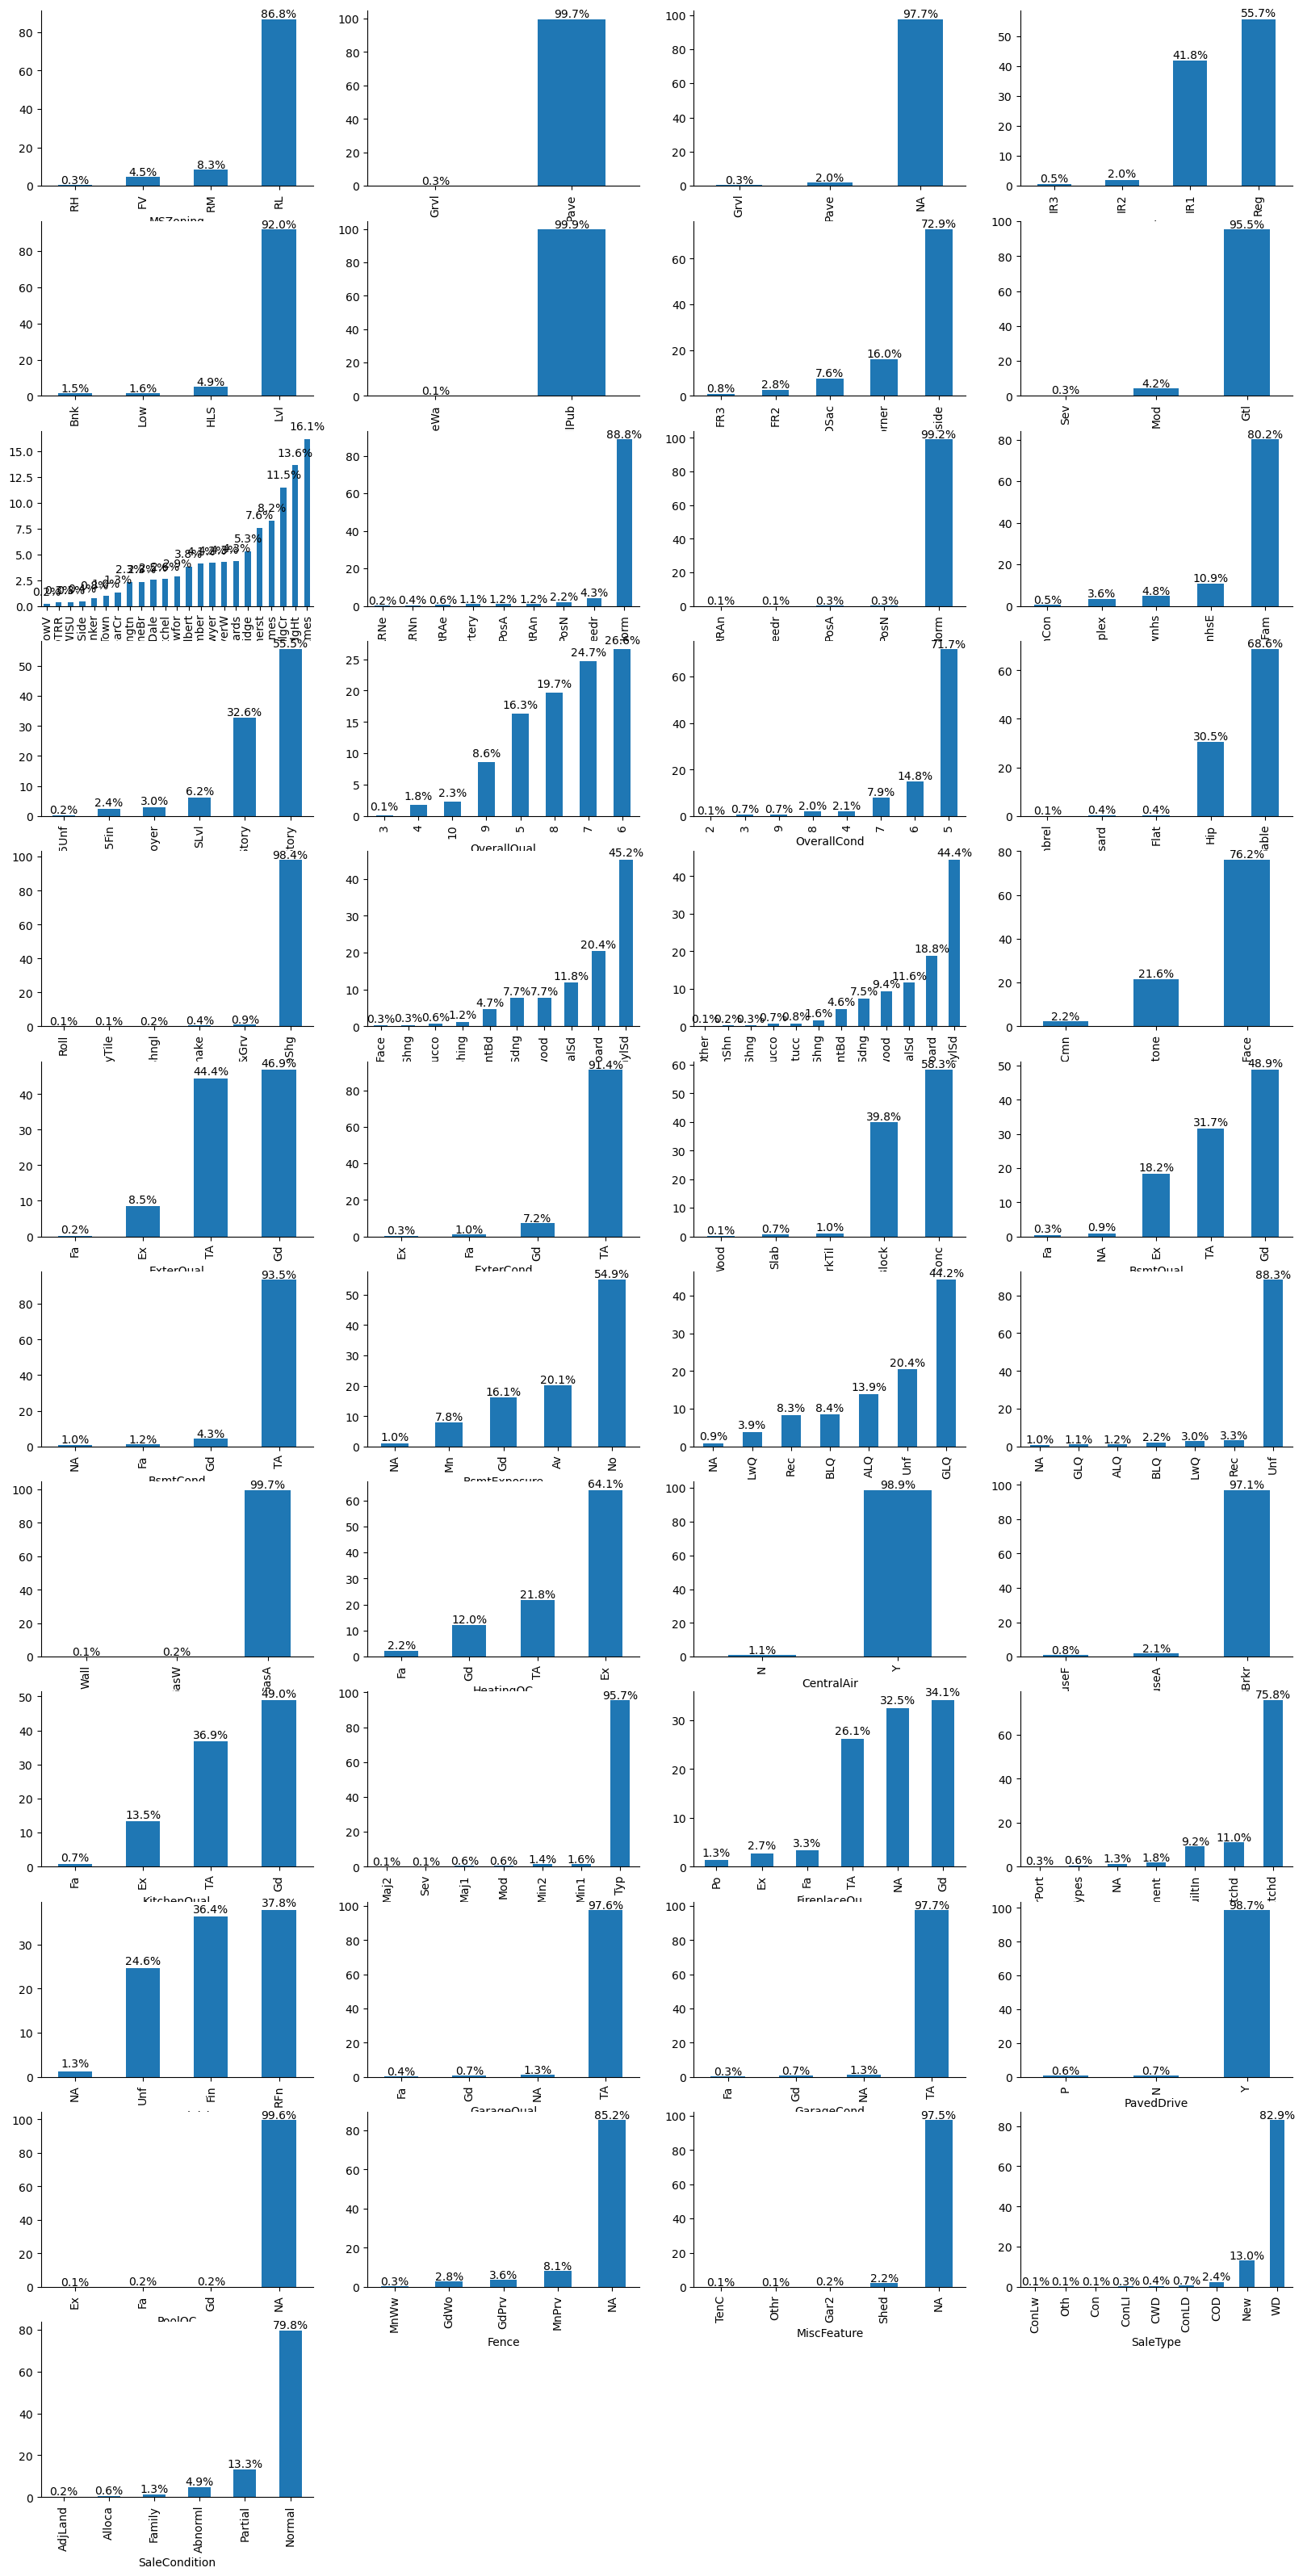

In [18]:
Categoricalcol=df.select_dtypes(include=["object"]).columns.tolist()

# bar chart for percentages of each sub category
plt.figure(figsize=(20,40))
for i,col in enumerate(Categoricalcol):
    plt.subplot(12,4,i+1)
    chart=(df[col].value_counts(normalize=True)*100).sort_values().plot(kind = 'bar')
    displayBarValues(chart,"per")
    hideLinesForBar(chart)
    plt.xlabel(col)
plt.show()

In [19]:
# print(Categoricalcol)

drop_col=["Alley", "GarageCond", "PoolQC", "MiscFeature", "BsmtCond", "GarageQual", "Street",
         "LandSlope", "PavedDrive", "Functional", "CentralAir", "Heating", "RoofMatl", "Utilities", "Condition2"]

df.drop(drop_col,axis=1,inplace=True)

In [20]:
def changeCatVal(val):
    catValues=["GLQ","ALQ","BLQ","NA","LwQ","Rec"]
    if val in catValues:
        return "OTHER"
    else:
        return val
df["BsmtFinType2"]=df["BsmtFinType2"].apply(lambda x:changeCatVal(x))

In [21]:
df["FireplaceQu"]=df["FireplaceQu"].apply(lambda x : "OTHER" if x=="Fa"or x=="Ex" or x=="Po" else x)

In [22]:
numericalcol=df.select_dtypes(include=np.number).columns.tolist()
numCol_df=df[numericalcol]
numCol_df.shape

(1152, 34)

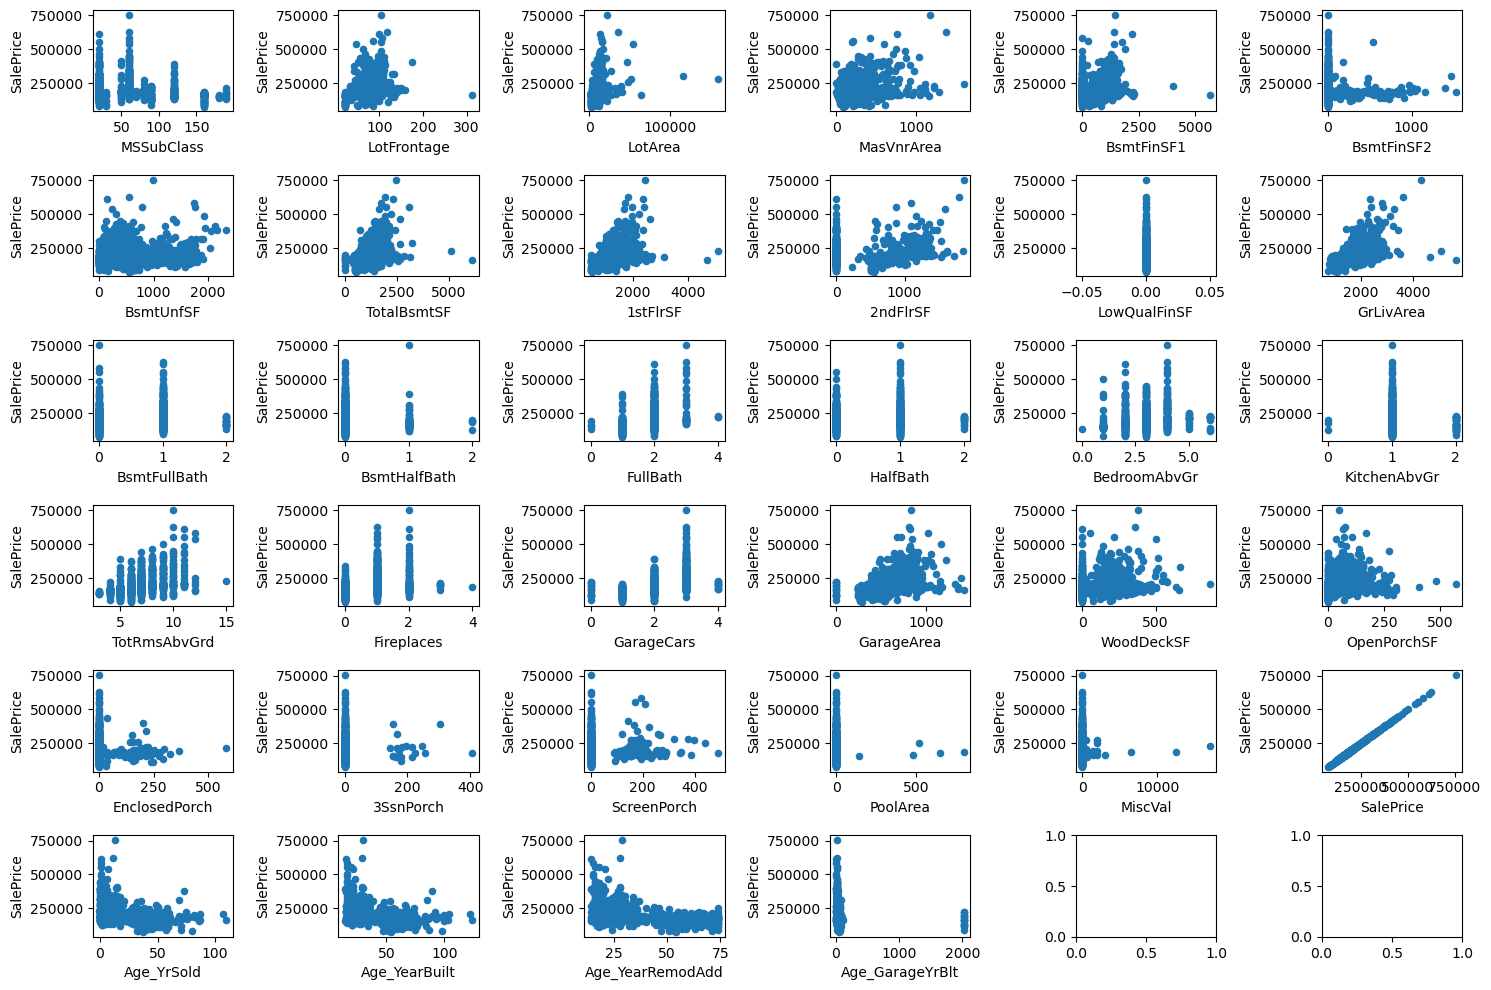

In [23]:
fig, axes = plt.subplots(6, 6, figsize=(15,10))
for idx, feature in enumerate(numCol_df.columns):
    numCol_df.plot(feature, "SalePrice", subplots=True, kind="scatter",ax=axes[idx // 6,idx % 6])
fig.tight_layout()
plt.show()

In [24]:
# plt.figure(figsize=(25,20))
# corre=df.corr()
# ax=sns.heatmap(corre,annot=True,cmap="YlGnBu")
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5) 
# plt.show()

In [25]:
#Remove one of the highly correlated variables
df.drop(["GarageCars","1stFlrSF"],axis=1,inplace=True)

In [26]:
Categoricalcol=df.select_dtypes(include=["object"]).columns.tolist()
Categoricalcol

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'Fence',
 'SaleType',
 'SaleCondition']

In [27]:
df["BsmtFinType2"]=df["BsmtFinType2"].apply(lambda x: 1 if x=="Unf" else 0)

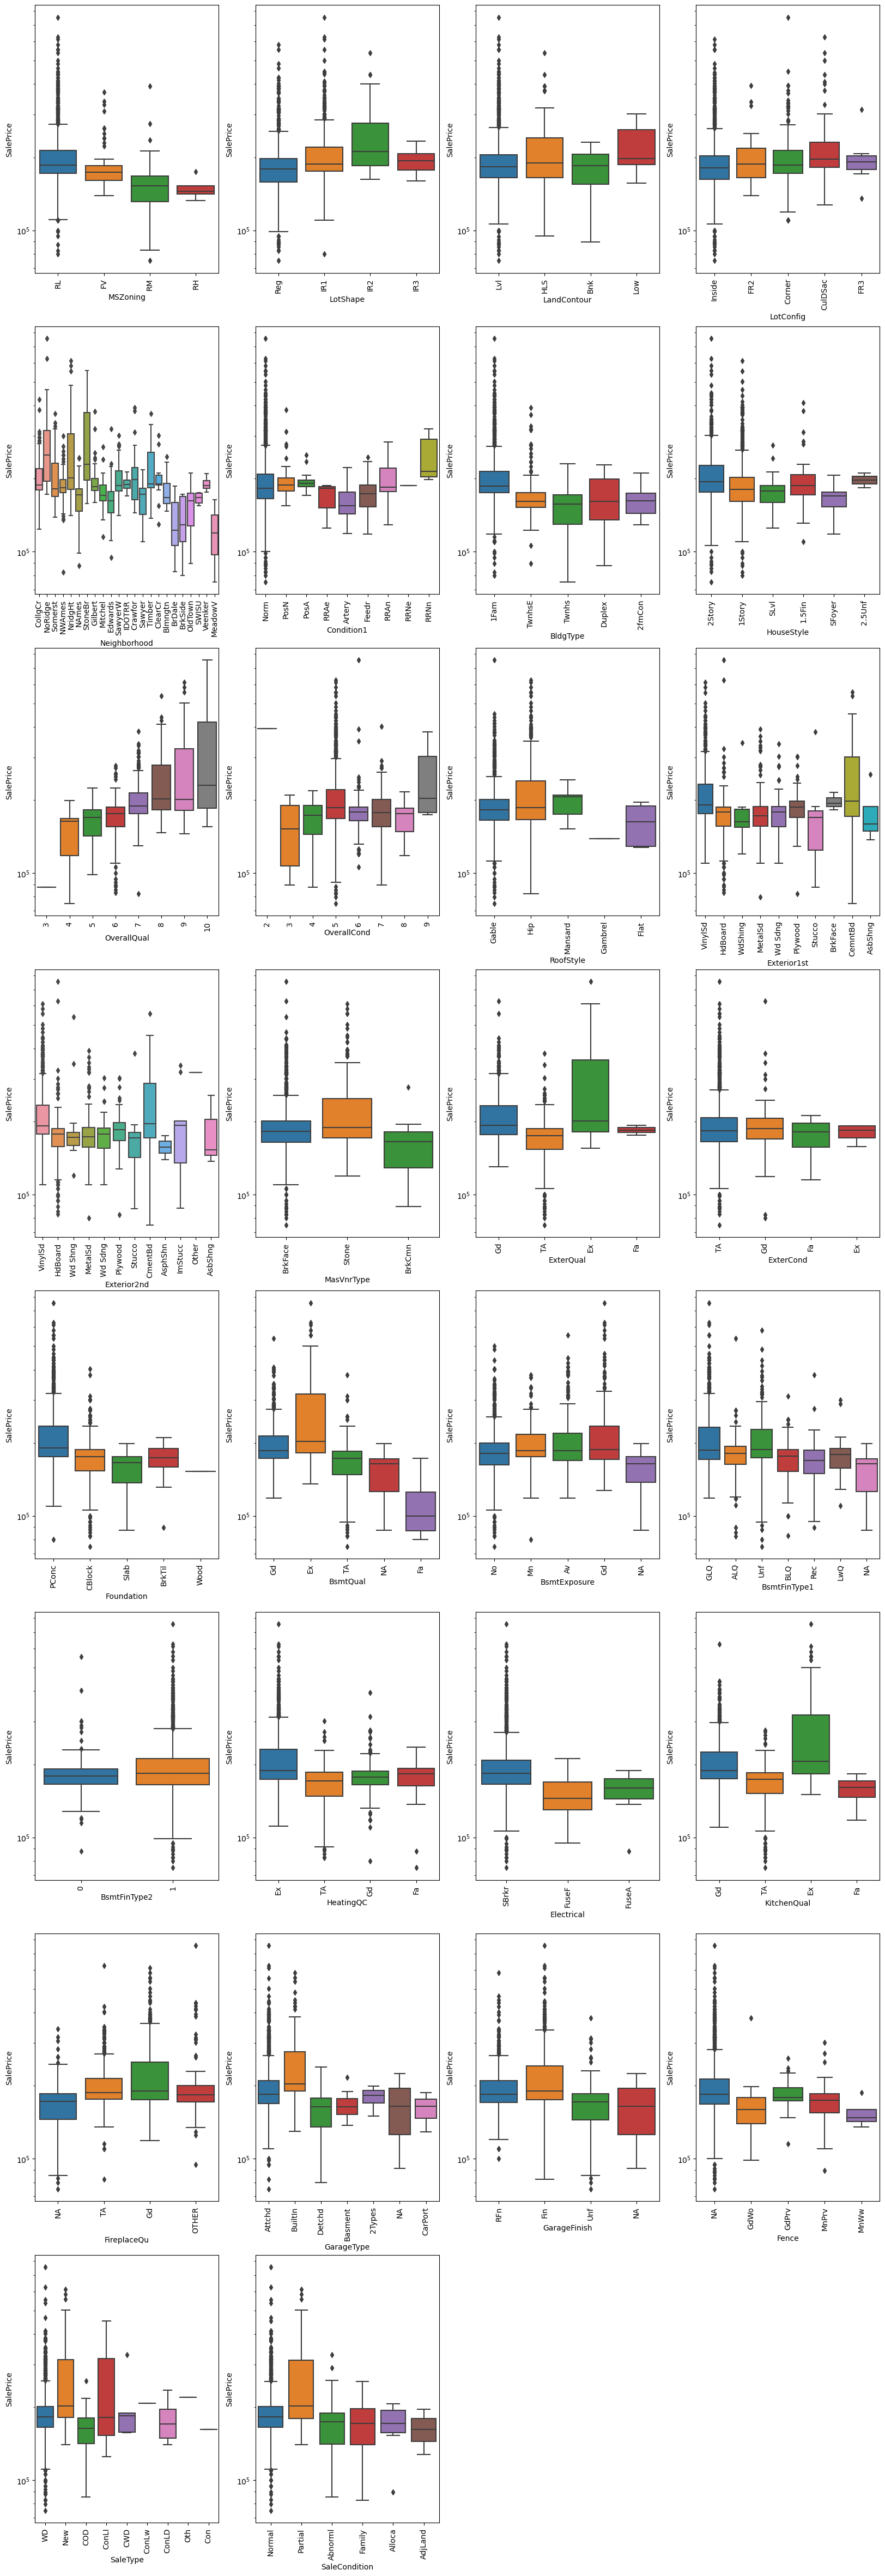

In [28]:
import seaborn as sns

plt.figure(figsize = (20,60))
for i, features in enumerate(Categoricalcol):
    plt.subplot(8,4, i+1)
    sns.boxplot(x = features, y = df['SalePrice'], data = df)
    plt.yscale('log')
    plt.xticks(rotation = 90)

#fig.tight_layout()
plt.show()

<Axes: >

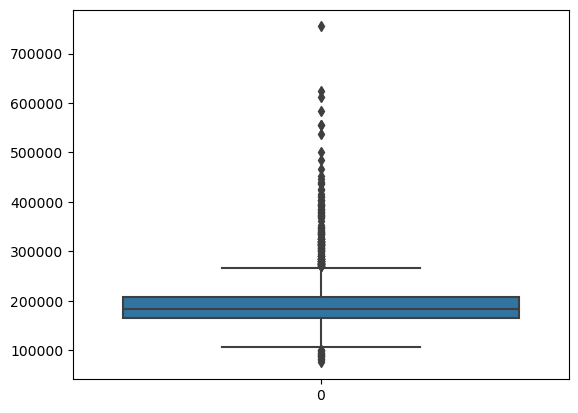

In [29]:
sns.boxplot(df['SalePrice'])

In [30]:
df = df[df.SalePrice <= 400000]

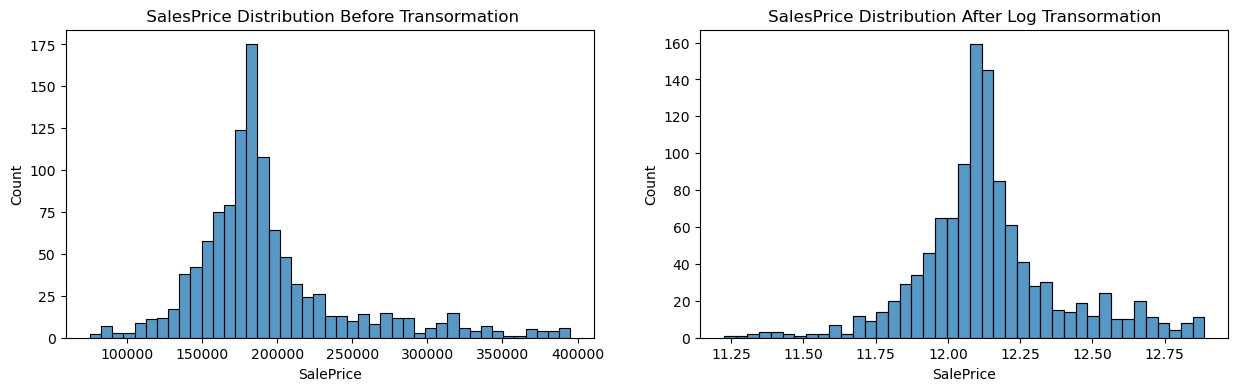

In [31]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.histplot(df.SalePrice)
plt.title(" SalesPrice Distribution Before Transormation")

# Transforming Target Variable to remove right skewness

df["SalePrice"]=np.log(df["SalePrice"])

plt.subplot(1,2,2)
sns.histplot(df.SalePrice)
plt.title("SalesPrice Distribution After Log Transormation")

plt.show()


In [32]:
df["SalePrice"].head()

0    12.247694
2    12.317167
4    12.429216
6    12.634603
7    12.206073
Name: SalePrice, dtype: float64

In [33]:
numericalcol=df.select_dtypes(include=np.number).columns.tolist()
numCol_df=df[numericalcol]
numCol_df.shape


Categoricalcol=df.select_dtypes(include=["object"]).columns.tolist()
Categoricalcol

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'Fence',
 'SaleType',
 'SaleCondition']

In [34]:
df["GarageType"].head(50)

0       Attchd
2       Attchd
4       Attchd
6       Attchd
7       Attchd
11     BuiltIn
13      Attchd
14      Attchd
16      Attchd
20     BuiltIn
22      Attchd
25      Attchd
27      Attchd
34      Attchd
35     BuiltIn
37      Attchd
40      Attchd
45      Attchd
55      Attchd
56      Attchd
62      Attchd
64      Attchd
65     BuiltIn
66      Attchd
67      Attchd
70      Attchd
72      Attchd
73      Attchd
80      Attchd
81      Attchd
82      Attchd
83      Detchd
84     BuiltIn
85      Attchd
87      Detchd
91      Attchd
95     BuiltIn
96      Attchd
97      Attchd
100     Attchd
101     Attchd
104     Detchd
105     Attchd
109     Attchd
112    BuiltIn
113    Basment
115     Detchd
116     Attchd
122     Attchd
128     Attchd
Name: GarageType, dtype: object

In [35]:
#Changing Categorical Varibles

GarageType_dummy= pd.get_dummies(df["GarageType"],drop_first=True,prefix="GarType")
#concat df
df=pd.concat([GarageType_dummy,df],axis=1)

#GarageFinish
GarageFinish_dummy= pd.get_dummies(df["GarageFinish"],prefix="GarageFinish")
GarageFinish_dummy.drop(["GarageFinish_NA"],inplace=True,axis=1)
df=pd.concat([GarageFinish_dummy,df],axis=1)

# Drop Original variables
df.drop(["GarageType","GarageFinish"],axis=1,inplace=True)

df.shape

(1129, 69)

In [36]:
BsmtQual_dummy = pd.get_dummies(df["BsmtQual"],prefix="BsmtQual",drop_first=True)
df=pd.concat([BsmtQual_dummy,df],axis=1)

#BsmtExposure
BsmtExposure_dummy= pd.get_dummies(df["BsmtExposure"],prefix="BsmtExposure")
BsmtExposure_dummy.drop(["BsmtExposure_NA"],inplace=True,axis=1)
df=pd.concat([BsmtExposure_dummy,df],axis=1)

#BsmtFinType1
BsmtFinType1_dummy= pd.get_dummies(df["BsmtFinType1"],prefix="BsmtFinType1")
BsmtFinType1_dummy.drop(["BsmtFinType1_NA"],inplace=True,axis=1)
df=pd.concat([BsmtFinType1_dummy,df],axis=1)

#DROP ORIGINAL VARIABLES
df.drop(["BsmtQual","BsmtExposure","BsmtFinType1"],axis=1,inplace=True)

In [37]:
Categoricalcol=df.select_dtypes(include=["object"]).columns.tolist()
dummies= pd.get_dummies(df[Categoricalcol],drop_first=True)

#Concat two dataframes
df=pd.concat([df,dummies],axis=1)

#drop original variables
df.drop(Categoricalcol,axis=1,inplace=True)

In [38]:
df["SalePrice"].head()

0    12.247694
2    12.317167
4    12.429216
6    12.634603
7    12.206073
Name: SalePrice, dtype: float64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1129 entries, 0 to 1458
Columns: 186 entries, BsmtFinType1_ALQ to SaleCondition_Partial
dtypes: bool(153), float64(11), int64(22)
memory usage: 468.6 KB


In [40]:
from sklearn.model_selection import train_test_split
traindf, testdf = train_test_split(df, test_size=0.35)

traindf.head()

,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
55,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
208,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
298,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
299,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
812,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False


In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

traindf[numericalcol] = scaler.fit_transform(traindf[numericalcol])

testdf[numericalcol] = scaler.transform(testdf[numericalcol])

In [42]:
df["SalePrice"].head()

0    12.247694
2    12.317167
4    12.429216
6    12.634603
7    12.206073
Name: SalePrice, dtype: float64

In [43]:
y_train = traindf.pop('SalePrice')
x_train = traindf

y_test = testdf.pop('SalePrice')
x_test = testdf

In [45]:
x_train.head()

,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
55,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
208,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
298,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
299,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
812,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False


In [132]:
y_train.head()

116    0.346365
510    0.572178
789    0.533595
45     0.549828
245    0.485492
Name: SalePrice, dtype: float64

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

models = [DecisionTreeRegressor, LinearRegression, Ridge, XGBRegressor, RandomForestRegressor]

for i in models:
    lm = i()
    Model = lm.fit(x_train, y_train)
    prediction = Model.predict(x_train)
    prediction_test = Model.predict(x_test)
    
#     mse = mean_squared_error(prediction_test, y_test)
#     rmse = math.sqrt(mse)
#     print(rmse)
    #print(prediction)
    new_df = pd.DataFrame(prediction,y_train)
    new_test = pd.DataFrame(prediction_test,y_test)
    #print(new_df.head(20))    
    #print(new_test.head(20))    
    mae = r2_score(y_train,prediction)
    print( i, mae)
    mae_test= r2_score(y_test, prediction_test)
    print(i, mae_test)    

<class 'sklearn.tree._classes.DecisionTreeRegressor'> 0.9995704388983975
<class 'sklearn.tree._classes.DecisionTreeRegressor'> 0.009532332087444306
<class 'sklearn.linear_model._base.LinearRegression'> 0.5509035976732052
<class 'sklearn.linear_model._base.LinearRegression'> 0.33227297502962494
<class 'sklearn.linear_model._ridge.Ridge'> 0.5347786488453076
<class 'sklearn.linear_model._ridge.Ridge'> 0.3807440855776445
<class 'xgboost.sklearn.XGBRegressor'> 0.9990545833726261
<class 'xgboost.sklearn.XGBRegressor'> 0.42206250972478077
<class 'sklearn.ensemble._forest.RandomForestRegressor'> 0.9134173448399384
<class 'sklearn.ensemble._forest.RandomForestRegressor'> 0.4669579563142996


In [90]:
y_test.head()

865     0.411038
1184    0.548784
530     0.485611
135     0.506394
679     0.323994
Name: SalePrice, dtype: float64

In [89]:
new_test.head()

,0
SalePrice,
0.411038,0.474936
0.548784,0.583952
0.485611,0.531849
0.506394,0.526037
0.323994,0.484032


In [98]:
ridge = Ridge()
xg = XGBRegressor()
re = Ridge()
rf = RandomForestRegressor()
lm = LinearRegression()

rfe=RFE(estimator=xg,n_features_to_select=30)
Model2 = rfe.fit(x_train, y_train)
prediction2 = Model2.predict(x_test)
#print(prediction)
new_df2 = pd.DataFrame(prediction2, y_test)
#print(new_df2.head(50))    
mae2 = r2_score(y_test, prediction2)
print(mae2)

0.3402055753055596


In [111]:
colRFESupported = x_train.columns[rfe.support_]
colRFESupported

X_train=x_train[colRFESupported]
X_test = x_test[colRFESupported]

In [118]:
models = [DecisionTreeRegressor, LinearRegression, Ridge, XGBRegressor, RandomForestRegressor]

for i in models:
    lm = i()
    Model = lm.fit(X_train, y_train)
    prediction = Model.predict(X_train)
    prediction_test = Model.predict(X_test)
    #print(prediction)
    new_df = pd.DataFrame(prediction,y_train)
    new_test = pd.DataFrame(prediction_test,y_test)
    #print(new_df.head(20))    
    #print(new_test.head(20))    
    mae = r2_score(y_train,prediction)
    print( i, mae)
    mae_test= r2_score(y_test, prediction_test)
    print(i, mae_test)
#     mse = mean_squared_error(prediction_test, y_test)
#     rmse = math.sqrt(mse)
#     print(i, rmse)

<class 'sklearn.tree._classes.DecisionTreeRegressor'> 0.9981152322862366
<class 'sklearn.tree._classes.DecisionTreeRegressor'> -0.11089365573905074
<class 'sklearn.tree._classes.DecisionTreeRegressor'> 0.15969773491314776
<class 'sklearn.linear_model._base.LinearRegression'> 0.4442637258259411
<class 'sklearn.linear_model._base.LinearRegression'> 0.3367011548016372
<class 'sklearn.linear_model._base.LinearRegression'> 0.12340056087950453
<class 'sklearn.linear_model._ridge.Ridge'> 0.4407041203665226
<class 'sklearn.linear_model._ridge.Ridge'> 0.3397203577541088
<class 'sklearn.linear_model._ridge.Ridge'> 0.12311939329150373
<class 'xgboost.sklearn.XGBRegressor'> 0.9976941165121075
<class 'xgboost.sklearn.XGBRegressor'> 0.3402055753055596
<class 'xgboost.sklearn.XGBRegressor'> 0.12307414680354731
<class 'sklearn.ensemble._forest.RandomForestRegressor'> 0.9133284378761759
<class 'sklearn.ensemble._forest.RandomForestRegressor'> 0.41315681425003803
<class 'sklearn.ensemble._forest.RandomF

In [113]:
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor

xg = XGBRegressor()
re = Ridge()
rf = RandomForestRegressor()
lm = LinearRegression()
vc = VotingRegressor([ ('clf4',rf) ,("clf1", lm), ('clf2', re)])

In [114]:
model = vc.fit(X_train, y_train)
prediction = model.predict(X_train)
prediction2 = model.predict(X_test)
#print(prediction)
new_df = pd.DataFrame(prediction,y_train)
new_df2 = pd.DataFrame(prediction2,y_test)
#print(new_df.head(20))    
#print(new_df2.head(20))    
mae = r2_score(y_train, prediction)
print(mae)
mae2 = r2_score(y_test, prediction2)
print(mae2)

0.6619327942135922
0.3939131745499326
